# **Project Name: Exploratory Data Analysis of Electric Vehicle (EV) Charging Stations Worldwide**

The expansion of electric vehicle (EV) charging infrastructure is crucial for supporting the global transition to sustainable transportation. As more consumers and businesses adopt EVs, understanding the distribution, availability, and efficiency of charging stations is essential for policymakers, urban planners, and industry leaders.

In this project, I will conduct an Exploratory Data Analysis (EDA) of EV charging stations worldwide. The goal of this analysis is to uncover patterns in charging station distribution, identify underserved areas, and analyze factors such as charger types, charging capacity, station operators, and renewable energy usage.

To ensure data integrity, I performed necessary data cleaning, including outlier removal using the Z-score method and assessing missing values separately. Additionally, data transformation was not necessary, as the dataset was already in a suitable format for analysis.

**By performing EDA, we can:**

- Identify geographic trends in charging station availability.
- Analyze the prevalence of different charger types (AC Level 1, AC Level 2, DC Fast Charger).
- Explore the relationship between station density and EV adoption.
- Investigate the role of renewable energy in EV charging infrastructure.
- Assess station reliability based on maintenance frequency and customer reviews.
- Provide insights for optimizing future charging infrastructure development.

This analysis will help urban planners, energy policymakers, and EV manufacturers make informed decisions to enhance EV charging accessibility and efficiency worldwide.


**By- Ali Akcin**

https://www.kaggle.com/datasets/vivekattri/global-ev-charging-stations-dataset

## **Importing Libraries**

In [ ]:
# Importing data analysis libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_context("talk")
sns.set_style("darkgrid")


**Read the EV dataset from the csv file**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_vehicles.csv")
# display the first few rows of the data
display(df.head(10))

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually
5,EVS00006,-23.695008,-46.548187,"1545 São Paulo Ave, São Paulo",AC Level 2,0.22,6:00-22:00,2.02,39,Ionity,350,Tesla,2016,Yes,3.2,9,Quarterly
6,EVS00007,55.762409,37.655830,"1390 Moscow Ave, Moscow",AC Level 1,0.40,24/7,2.68,89,ChargePoint,350,"Tesla, CCS",2011,Yes,4.0,4,Annually
7,EVS00008,13.715561,100.561468,"7684 Bangkok Ave, Bangkok",AC Level 2,0.26,24/7,3.63,72,Ionity,350,Tesla,2013,Yes,4.3,9,Annually
8,EVS00009,41.807653,-87.755349,"6203 Chicago Ave, Chicago",AC Level 2,0.49,9:00-18:00,6.68,68,Greenlots,350,CCS,2013,No,3.4,1,Monthly
9,EVS00010,39.968701,116.433865,"4339 Beijing Ave, Beijing",AC Level 2,0.37,9:00-18:00,19.13,82,Tesla,150,"CCS, Tesla",2023,No,4.4,5,Quarterly


#### **Feature Variables:**

**Station ID:** Unique identifier for each EV charging station.

**Latitude & Longitude:** Geographical coordinates of the charging station.

**Address:** Physical location of the station, including street, city, and country.

**Charger Type:** Type of charger available (e.g., AC Level 1, AC Level 2, DC Fast Charger).

**Cost (USD/kWh):** Charging cost per kilowatt-hour in USD.

**Availability:** Operating hours of the charging station.

**Distance to City (km):** Distance of the charging station from the nearest city center.

**Usage Stats (avg users/day):** Average number of users per day at the charging station.

**Station Operator:** The entity managing or owning the charging station (e.g., EVgo, ChargePoint).

**Charging Capacity (kW):** Maximum power output of the charging station.

**Connector Types:** Types of charging connectors available (e.g., CCS, CHAdeMO).

**Installation Year:** The year the charging station was installed.

**Renewable Energy Source:** Indicates whether the charging station is powered by renewable energy (Yes/No).

**Reviews (Rating):** Customer reviews or ratings of the charging station.

**Parking Spots:** Number of parking spaces available at the charging station.

**Maintenance Frequency:** How often the charging station undergoes maintenance (e.g., Annually).

#### **Target Variable:**

**Charging Station Usage:** The average number of daily users at the charging station, representing its demand and usage trends.


In [ ]:
# for checking missing value in VW dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   4964 non-null   object 
 1   Latitude                     4964 non-null   float64
 2   Longitude                    4964 non-null   float64
 3   Address                      4964 non-null   object 
 4   Charger Type                 4964 non-null   object 
 5   Cost (USD/kWh)               4964 non-null   float64
 6   Availability                 4964 non-null   object 
 7   Distance to City (km)        4964 non-null   float64
 8   Usage Stats (avg users/day)  4964 non-null   int64  
 9   Station Operator             4964 non-null   object 
 10  Charging Capacity (kW)       4964 non-null   int64  
 11  Connector Types              4964 non-null   object 
 12  Installation Year            4964 non-null   int64  
 13  Renewable Energy S

**Remarks:**

1. Number of observations (rows): 4,964

2. Number of columns: 17 (16 feature variables and 1 target variable)

3. Number of categorical variables: 8 (e.g., Charger Type, Station Operator,
Connector Types, Availability, Renewable Energy Source, Maintenance Frequency)

4. Number of numerical variables: 9 (e.g., Latitude, Longitude, Cost (USD/kWh), Distance to City (km), Usage Stats (avg users/day), Charging Capacity (kW), Installation Year, Reviews (Rating), Parking Spots)

5. Missing values: None detected

In [ ]:
# statistics of the numerical variables
display(df.describe())

,Latitude,Longitude,Cost (USD/kWh),Distance to City (km),Usage Stats (avg users/day),Charging Capacity (kW),Installation Year,Reviews (Rating),Parking Spots
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,20.692784,8.868565,0.300365,10.207184,55.403908,143.832393,2016.564263,3.994863,5.518735
std,31.202499,93.672449,0.115882,5.607918,26.500329,128.148693,4.003436,0.582587,2.871317
min,-76.865656,-178.870028,0.100000,0.500000,10.000000,22.000000,2010.000000,3.000000,1.000000
25%,13.773456,-87.680970,0.200000,5.450000,32.000000,50.000000,2013.000000,3.500000,3.000000
50%,34.043653,18.495233,0.300000,10.190000,56.000000,150.000000,2017.000000,4.000000,5.000000
75%,41.847680,100.456151,0.400000,14.910000,79.000000,150.000000,2020.000000,4.500000,8.000000
max,89.464534,179.526528,0.500000,20.000000,100.000000,350.000000,2023.000000,5.000000,10.000000


**Assumptions:**

* Cost (USD/kWh) is in dollars per kilowatt-hour ($/kWh).

* Distance to City is measured in kilometers (km).

* Charging Capacity is in kilowatts (kW).

* Usage Stats represent the average number of users per day.

**Remarks:**
* The oldest charging station in the dataset was installed in 2010.

* The latest charging station was installed in 2023.

* The average cost per kWh is $0.30.

* The highest charging cost is $0.50/kWh, while the lowest is $0.10/kWh.

* The highest charging capacity is 350 kW, supporting ultra-fast charging.

* The lowest charging capacity is 22 kW, typical for slower Level 2 chargers.

* Charging stations are located 0.5 km to 20 km away from the nearest city.

* The busiest station serves 100 users/day, while the least-used station serves
10 users/day.

* Customer ratings range from 3.0 to 5.0, with an average rating of ~4.0.

* Stations have 1 to 10 parking spots, with a median of 5 spots per station.

In [ ]:
# Statistics of the object (categorical) variables
display(df.describe(include='object'))

# Print the unique charger types
print("Charger Types: ", df['Charger Type'].unique())

# Print the unique station operators
print("Station Operators: ", df['Station Operator'].unique())

# Print the unique connector types
print("Connector Types: ", df['Connector Types'].unique())

# Print the unique maintenance frequencies
print("Maintenance Frequency: ", df['Maintenance Frequency'].unique())

# Print the unique renewable energy sources
print("Renewable Energy Source: ", df['Renewable Energy Source'].unique())


,Station ID,Address,Charger Type,Availability,Station Operator,Connector Types,Renewable Energy Source,Maintenance Frequency
count,4964,4964,4964,4964,4964,4964,4964,4964
unique,4964,4897,3,3,5,16,2,3
top,EVS05000,"7694 Berlin Ave, Berlin",AC Level 2,24/7,Tesla,CCS,Yes,Monthly
freq,1,3,1748,1669,1022,671,2545,1670


Charger Types:  ['AC Level 2' 'DC Fast Charger' 'AC Level 1']
Station Operators:  ['EVgo' 'ChargePoint' 'Greenlots' 'Ionity' 'Tesla']
Connector Types:  ['CCS, CHAdeMO' 'Tesla, Type 2' 'Type 2, CCS' 'Type 2' 'CCS' 'Tesla'
 'Tesla, CCS' 'CCS, Tesla' 'Tesla, CHAdeMO' 'CHAdeMO, CCS' 'CHAdeMO'
 'Type 2, CHAdeMO' 'CHAdeMO, Tesla' 'CHAdeMO, Type 2' 'CCS, Type 2'
 'Type 2, Tesla']
Maintenance Frequency:  ['Annually' 'Monthly' 'Quarterly']
Renewable Energy Source:  ['Yes' 'No']


**Remarks:**

* There are 3 unique charger types available. Among them, 'AC Level 2' is the most common, appearing in 1,748 stations.

* There are 5 different station operators. Among them, 'Tesla' operates the highest number of stations (1,022).

* There are 16 different connector types present in the dataset. The most common is 'CCS', appearing in 671 stations.

* 2 categories of renewable energy sources exist, with 'Yes' being the most frequent (2,545 stations).

* 3 different maintenance frequency schedules are recorded, with 'Monthly' being the most common (1,670 stations).

## **Data Exploration using Plots and Graphs**

### **Bar Plot: Percentage of charging stations, Average and Total Cost (USD/kWh) by Charger Type, Station Operator, and Connector Type**

**Questions:**
* What are the top 5 most common charging station operators in the dataset?
* What is the average cost (USD/kWh) for the top 5 most common charging station operators?
* What is the total number of charging stations for the top 5 charging station operators?

In [ ]:
# Data aggregation using groupby method
def group(col, metric):
    df_group = df.groupby(col)[metric].agg(['count', 'mean', 'sum'])

    # Debugging: Print raw data before sorting
    print("Raw Grouped Data (Before Sorting):")
    print(df_group.head(10))

    # Sorting by sum
    df_group = df_group.sort_values(by='sum', ascending=False)

    # Create a percentage column
    df_group['percent_of_stations'] = (df_group['sum'] / df_group['sum'].sum()) * 100

    # Remove unnecessary sum conversion
    # Rounding
    df_group = df_group.round(2)

    return pd.DataFrame(df_group)


In [ ]:
# Function call
df_grp = group('Charger Type', 'Charging Capacity (kW)')

# Display results
display(df_grp.head(5))  # Top 5 by total energy
display(df_grp.sort_values(by='mean', ascending=False).head(5))  # Top 5 by avg energy
display(df_grp.sort_values(by='percent_of_stations', ascending=False).head(5))  # Top 5 by percent



Raw Grouped Data (Before Sorting):
                 count        mean     sum
Charger Type                              
AC Level 1        1628  147.095823  239472
AC Level 2        1748  144.320366  252272
DC Fast Charger   1588  139.949622  222240


,count,mean,sum,percent_of_stations
Charger Type,,,,
AC Level 2,1748,144.32,252272,35.33
AC Level 1,1628,147.10,239472,33.54
DC Fast Charger,1588,139.95,222240,31.13


,count,mean,sum,percent_of_stations
Charger Type,,,,
AC Level 1,1628,147.10,239472,33.54
AC Level 2,1748,144.32,252272,35.33
DC Fast Charger,1588,139.95,222240,31.13


,count,mean,sum,percent_of_stations
Charger Type,,,,
AC Level 2,1748,144.32,252272,35.33
AC Level 1,1628,147.10,239472,33.54
DC Fast Charger,1588,139.95,222240,31.13


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot function
def bar_plot(data, x_col, y_col, color, orient):
    sns.barplot(data=data, x=x_col, y=y_col, color=color, orient=orient)



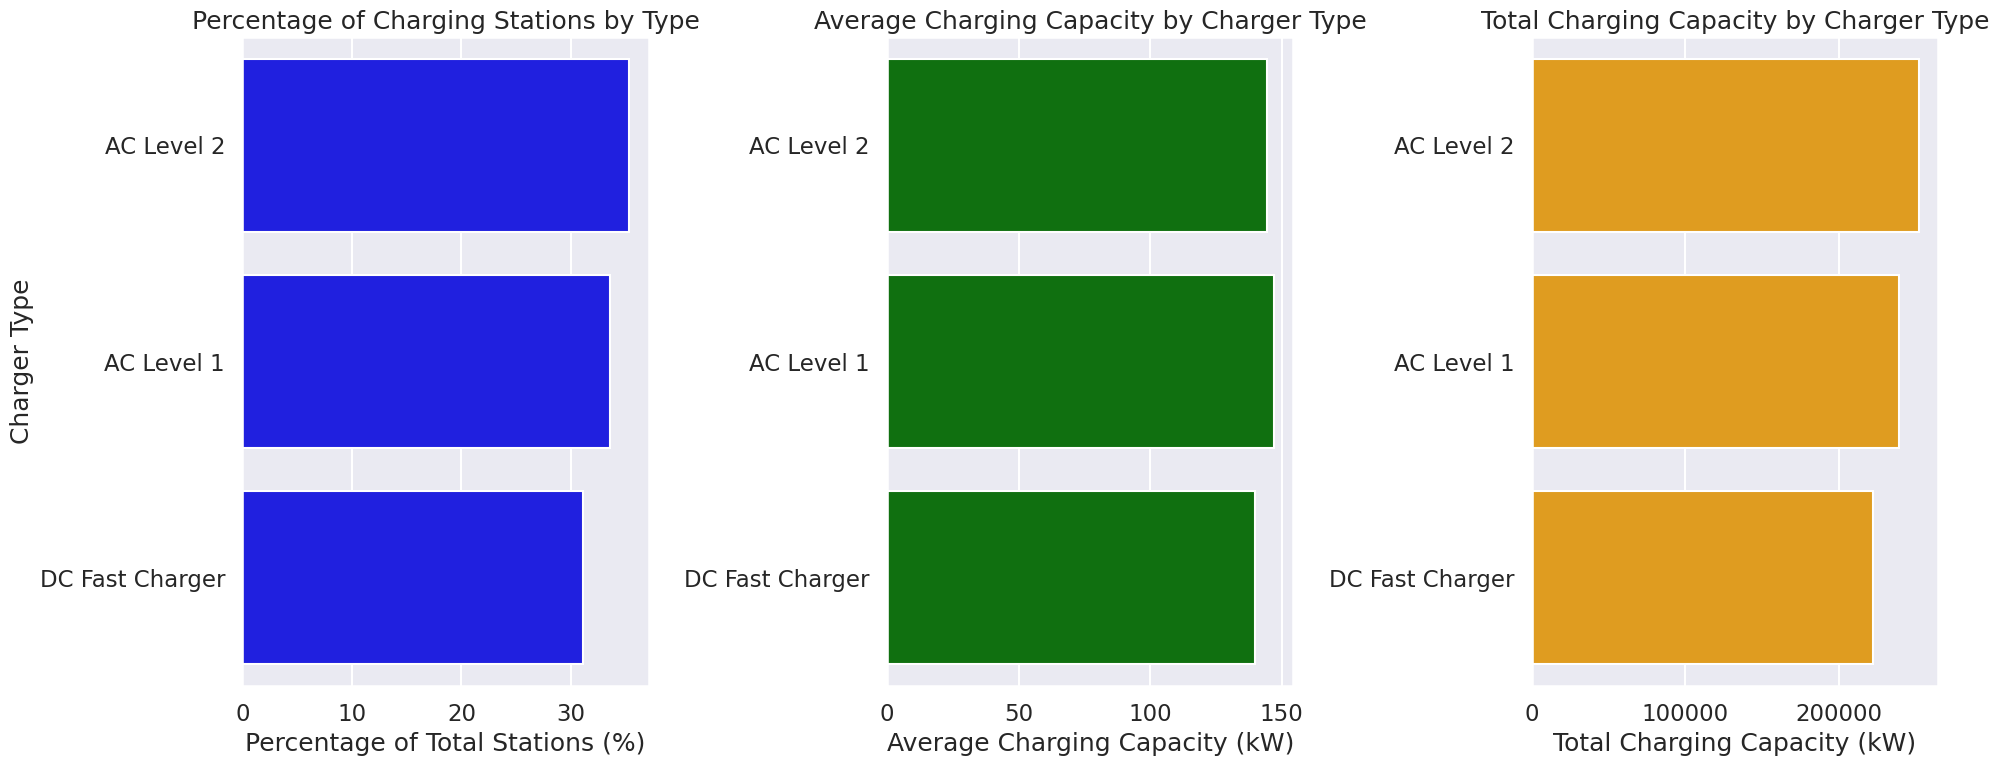

In [ ]:
# Set figure size (width, height)
plt.figure(figsize=(20, 8))

# Plot percentage of charging stations
plt.subplot(1, 3, 1)
bar_plot(data=df_grp, x_col='percent_of_stations', y_col=df_grp.index, color='blue', orient='h')
plt.title("Percentage of Charging Stations by Type")
plt.xlabel("Percentage of Total Stations (%)")

# Plot mean column (average charging capacity)
plt.subplot(1, 3, 2)
bar_plot(data=df_grp, x_col='mean', y_col=df_grp.index, color='green', orient='h')
plt.title("Average Charging Capacity by Charger Type")
plt.xlabel("Average Charging Capacity (kW)")
plt.ylabel("")

# Plot sum column (total charging capacity)
plt.subplot(1, 3, 3)
bar_plot(data=df_grp, x_col='sum', y_col=df_grp.index, color='orange', orient='h')
plt.title("Total Charging Capacity by Charger Type")
plt.xlabel("Total Charging Capacity (kW)")
plt.ylabel("")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Remarks:**

1. The top 3 charging station types by percentage are AC Level 2 (35.33%), AC Level 1 (33.54%), and DC Fast Charger (31.13%).

2. The top 3 average charging capacities are AC Level 1 (147.10 kW), AC Level 2 (144.32 kW), and DC Fast Charger (139.95 kW).

3. The top 3 total charging capacities are AC Level 2 (252,272 kW), AC Level 1 (239,472 kW), and DC Fast Charger (222,240 kW).

**Questions:**

* What is the most common connector type in the dataset?

* What is the average charging capacity of the most common connector type?

* What is the total number of charging stations for the most common connector type?

In [ ]:
# Group by Connector Type and summarize Charging Capacity (kW)
df_grp = group('Connector Types', 'Charging Capacity (kW)')

# Display the first 5 rows of the grouped data
display(df_grp.head(5))


Raw Grouped Data (Before Sorting):
                 count        mean     sum
Connector Types                           
CCS                671  149.684054  100438
CCS, CHAdeMO       182  141.802198   25808
CCS, Tesla         199  133.497487   26566
CCS, Type 2        198  142.303030   28176
CHAdeMO            620  140.890323   87352
CHAdeMO, CCS       197  147.888325   29134
CHAdeMO, Tesla     193  145.046632   27994
CHAdeMO, Type 2    200  145.940000   29188
Tesla              608  143.223684   87080
Tesla, CCS         217  137.447005   29826


,count,mean,sum,percent_of_stations
Connector Types,,,,
CCS,671,149.68,100438,14.07
Type 2,637,140.76,89666,12.56
CHAdeMO,620,140.89,87352,12.23
Tesla,608,143.22,87080,12.20
"Type 2, CHAdeMO",219,159.46,34922,4.89


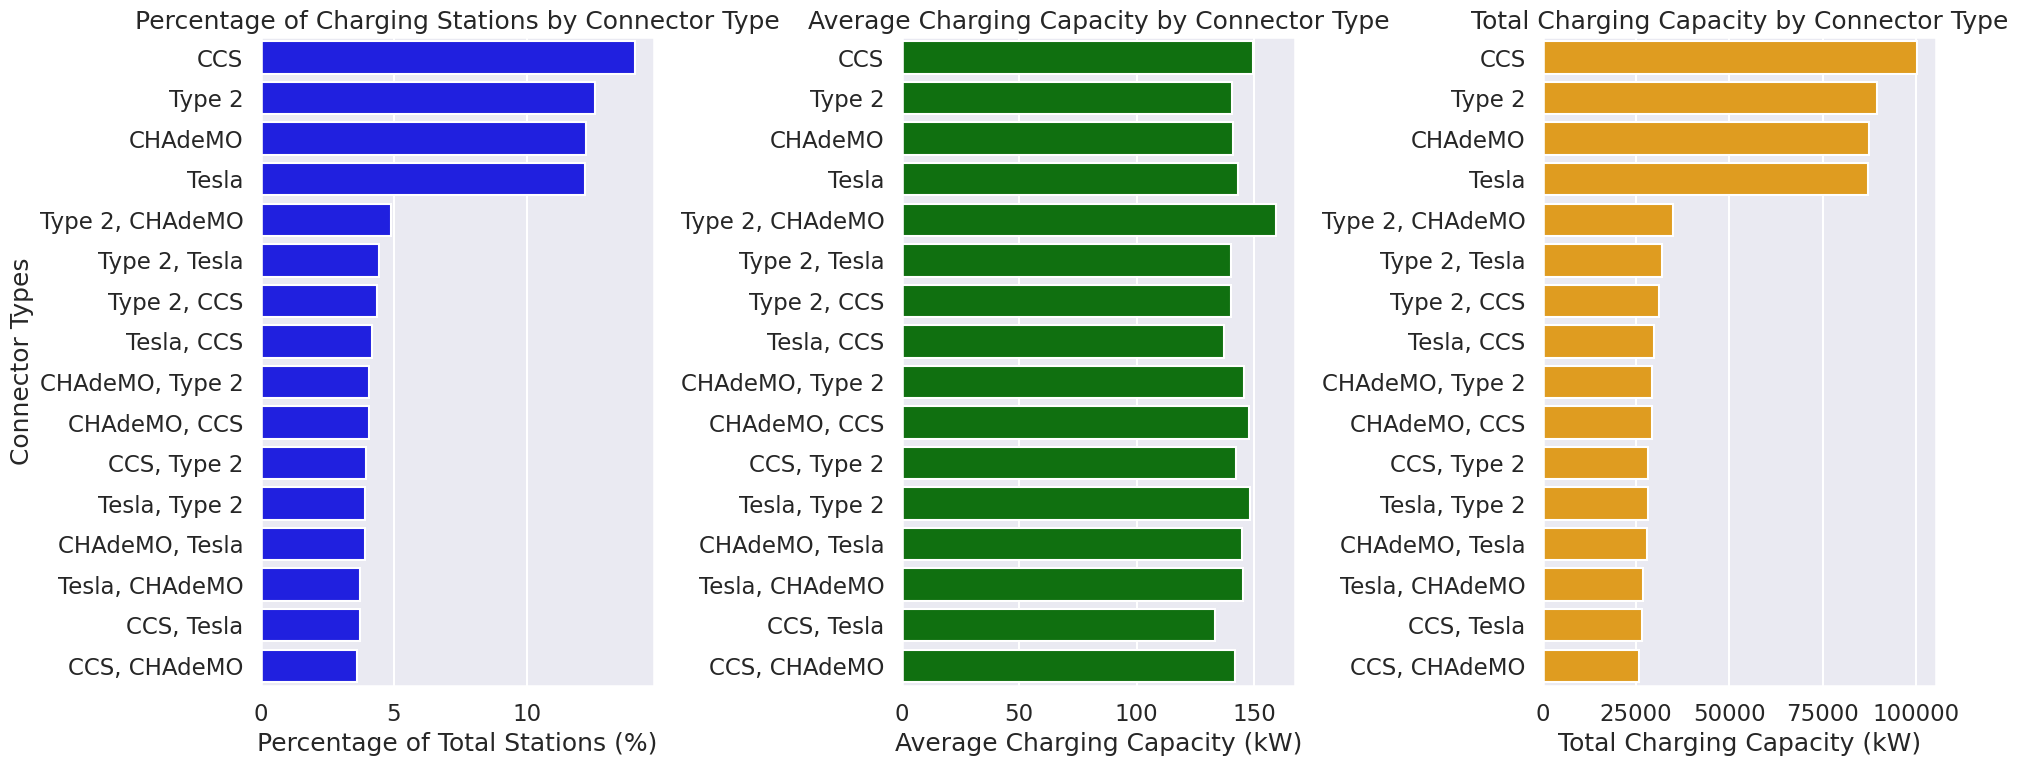

In [ ]:
# Set figure size (width, height)
plt.figure(figsize=(20, 8))

# Plot percentage of stations by connector type
plt.subplot(1, 3, 1)
bar_plot(data=df_grp, x_col='percent_of_stations', y_col=df_grp.index, color='blue', orient='h')
plt.title("Percentage of Charging Stations by Connector Type")
plt.xlabel("Percentage of Total Stations (%)")

# Plot mean column (average charging capacity)
plt.subplot(1, 3, 2)
bar_plot(data=df_grp, x_col='mean', y_col=df_grp.index, color='green', orient='h')
plt.title("Average Charging Capacity by Connector Type")
plt.xlabel("Average Charging Capacity (kW)")
plt.ylabel("")

# Plot sum column (total charging capacity)
plt.subplot(1, 3, 3)
bar_plot(data=df_grp, x_col='sum', y_col=df_grp.index, color='orange', orient='h')
plt.title("Total Charging Capacity by Connector Type")
plt.xlabel("Total Charging Capacity (kW)")
plt.ylabel("")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Remarks:**

1. From the various connector types, the most common connector type is CCS, found in 14.07% of stations.

2. The average charging capacity by connector type shows that Type 2, CHAdeMO connectors have the highest average capacity at 159.46 kW.

3. The total charging capacity per connector type reveals that CCS connectors provide the largest total charging capacity, with 100,438 kW across all stations.

**Questions**
* What is the most common renewable energy source used in the dataset?
* What is the average charging capacity of stations using the top renewable energy source?
* What is the total charging capacity of stations powered by the top renewable energy source?

In [ ]:
# Function to create pivot table for aggregation
def pivot(col):
    df_pivot = pd.pivot_table(df, index=(col), values='Charging Capacity (kW)', aggfunc=['count', 'mean', 'sum'])
    df_pivot = pd.DataFrame(df_pivot)

    # Rename columns for better readability
    df_pivot.columns = df_pivot.columns.map('_'.join).str.strip()

    # Sort the dataframe based on count
    df_pivot = df_pivot.sort_values(by='count_Charging Capacity (kW)', ascending=False)

    # Create a new column for percentage of stations using each renewable energy source
    df_pivot['percent_of_stations'] = (df_pivot['count_Charging Capacity (kW)'] / df_pivot['count_Charging Capacity (kW)'].sum()) * 100

    # Convert total charging capacity to megawatts (MW) for better readability
    df_pivot['sum_Charging Capacity (kW)'] = df_pivot['sum_Charging Capacity (kW)'] / 1000

    # Round values to two decimal places
    df_pivot = df_pivot.round(2)

    # Drop the count column
    df_pivot = df_pivot.drop('count_Charging Capacity (kW)', axis=1)

    return df_pivot

In [ ]:
# Apply the function to analyze Renewable Energy Source
df_pvt = pivot('Renewable Energy Source')
display(df_pvt)

,mean_Charging Capacity (kW),sum_Charging Capacity (kW),percent_of_stations
Renewable Energy Source,,,
Yes,145.56,370.45,51.27
No,142.01,343.53,48.73


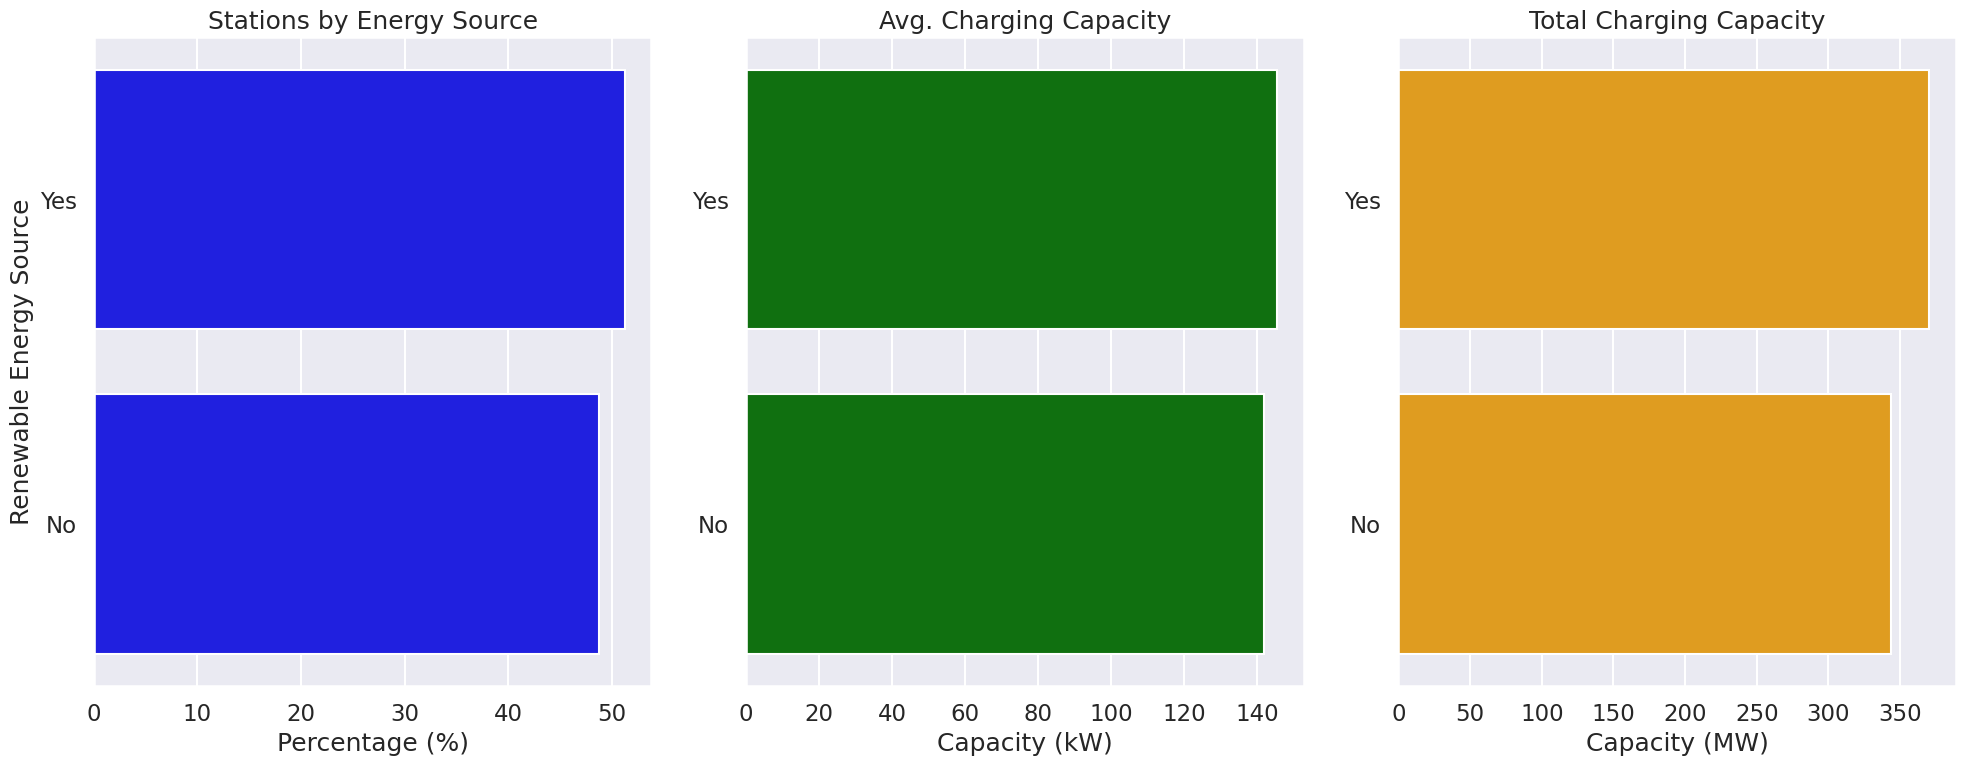

In [ ]:
# Set figure size
plt.figure(figsize=(20, 8))

# Plot percentage of stations using each renewable energy source
plt.subplot(1, 3, 1)
bar_plot(data=df_pvt, x_col='percent_of_stations', y_col=df_pvt.index, color='blue', orient='h')
plt.title("Stations by Energy Source")
plt.xlabel("Percentage (%)")

# Plot average charging capacity by renewable energy source
plt.subplot(1, 3, 2)
bar_plot(data=df_pvt, x_col='mean_Charging Capacity (kW)', y_col=df_pvt.index, orient='h', color='green')
plt.title("Avg. Charging Capacity")
plt.xlabel("Capacity (kW)")
plt.ylabel("")

# Plot total charging capacity by renewable energy source
plt.subplot(1, 3, 3)
bar_plot(data=df_pvt, x_col='sum_Charging Capacity (kW)', y_col=df_pvt.index, orient='h', color='orange')
plt.title("Total Charging Capacity")
plt.xlabel("Capacity (MW)")
plt.ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Remarks:
1. Majority of stations (51.27%) use renewable energy sources.
2. Stations using renewable energy have a slightly higher average charging capacity (145.56 kW) compared to non-renewable stations (142.01 kW).
3. Total charging capacity is higher for renewable-powered stations (370.45 MW) compared to non-renewable stations (343.53 MW).

## **Barplot of others Categorical features**

In [ ]:
# Working with categorical features, create a function
def percent_count(data, col):
    col_count = data[col].value_counts(normalize=True) * 100  # Get normalized counts and convert to percentage
    col_count = pd.DataFrame(col_count).reset_index()  # Convert to DataFrame and reset index
    col_count = col_count.rename(columns={"index": col, col: "% of Stations"})  # Rename columns

    col_count["% of Stations"] = col_count["% of Stations"].round(2)  # Round percentages

    return col_count


In [ ]:
# Function calls for each categorical feature
charger_type_count = percent_count(df, "Charger Type")
availability_count = percent_count(df, "Availability")
station_operator_count = percent_count(df, "Station Operator")
connector_type_count = percent_count(df, "Connector Types")
renewable_source_count = percent_count(df, "Renewable Energy Source")
maintenance_freq_count = percent_count(df, "Maintenance Frequency")

# Display one of the outputs
display(charger_type_count)

,% of Stations,proportion
0,AC Level 2,35.213537
1,AC Level 1,32.796132
2,DC Fast Charger,31.990330


In [ ]:
# Function to compute percentage counts for categorical features
def percent_count(data, col):
    col_count = data[col].value_counts(normalize=True) * 100  # Convert to percentage
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns={"index": col, col: "Percentage"})  # Standardized naming
    col_count["Percentage"] = col_count["Percentage"].round(2)  # Round percentages
    return col_count

# Generate percentage counts for each categorical column
charger_type_count = percent_count(df, "Charger Type")
availability_count = percent_count(df, "Availability")
station_operator_count = percent_count(df, "Station Operator")
connector_type_count = percent_count(df, "Connector Types")
renewable_energy_count = percent_count(df, "Renewable Energy Source")
maintenance_freq_count = percent_count(df, "Maintenance Frequency")

# Function to create bar plots with correct individual titles
def bar_plot(data, x_col, y_col, color, yticks, rotation, title):
    sns.barplot(x=x_col, y=y_col, data=data, color=color)
    plt.title(title, fontsize=13)  # Title dynamically set per feature
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)
    plt.xlabel("")  # Remove x-axis label
    plt.ylabel("")  # Remove y-axis label



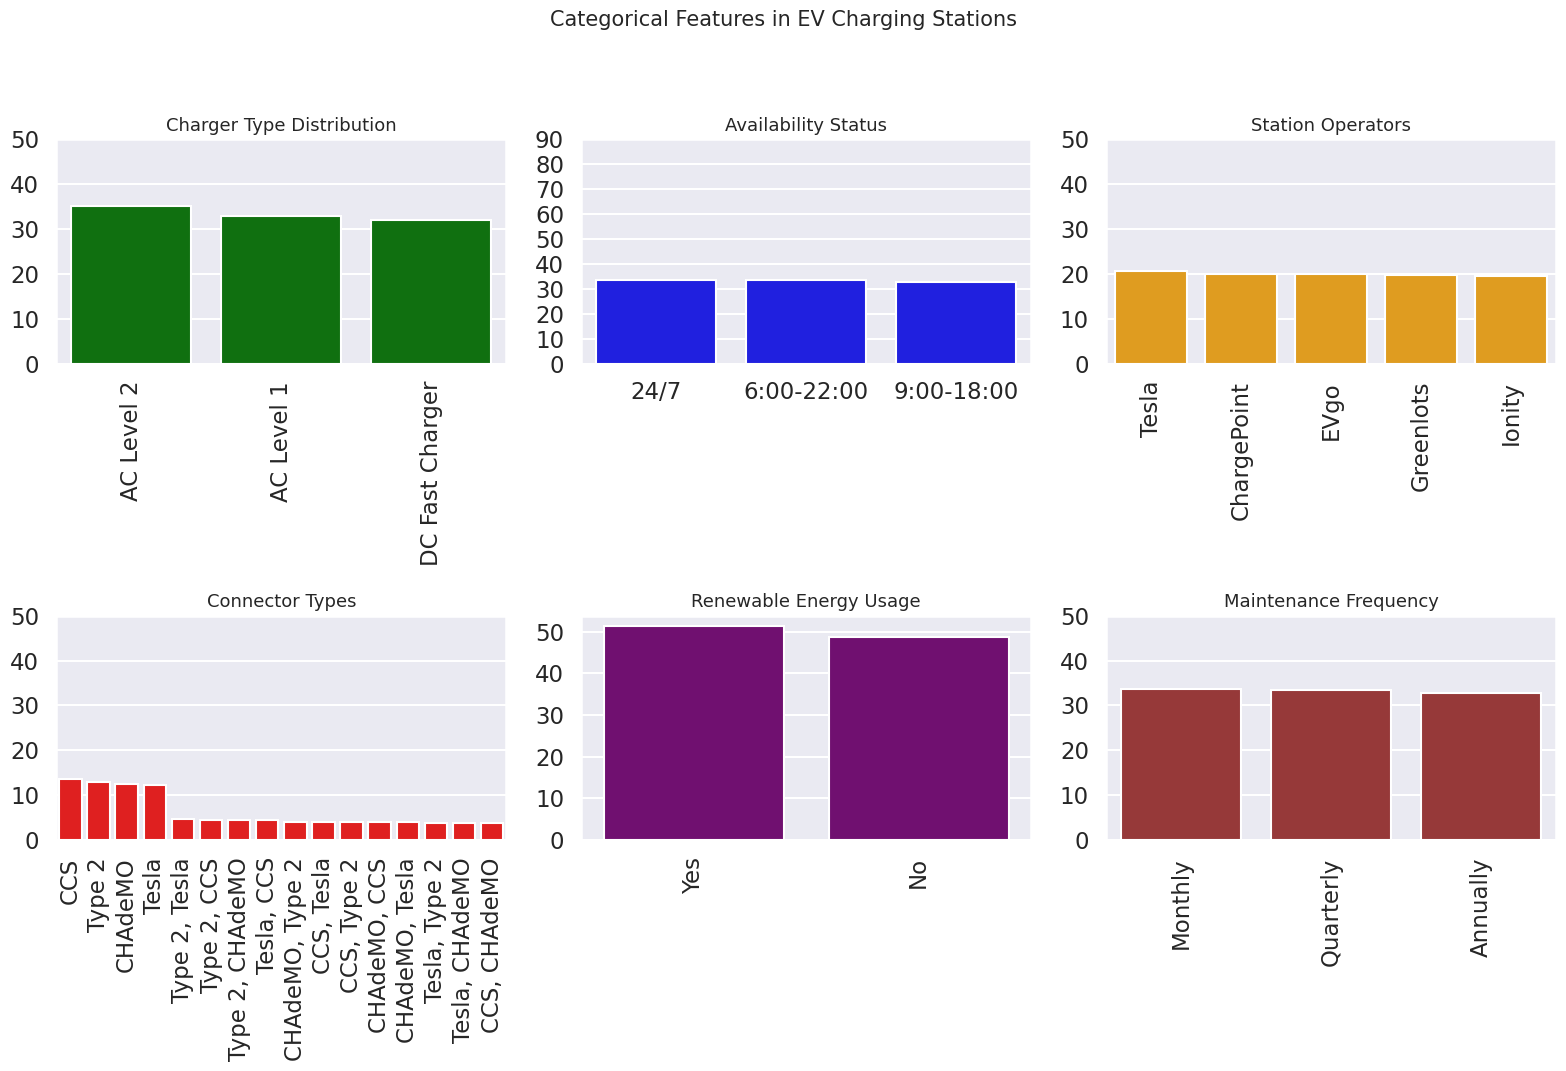

In [ ]:
# Plot categorical features
sns.set_context("talk")
plt.figure(figsize=(16, 11))  # Slightly larger for readability

# Subplot for Charger Type
plt.subplot(2, 3, 1)
bar_plot(charger_type_count, charger_type_count.columns[0], charger_type_count.columns[1], "green", np.arange(0, 60, 10), 90, "Charger Type Distribution")

# Subplot for Availability
plt.subplot(2, 3, 2)
bar_plot(availability_count, availability_count.columns[0], availability_count.columns[1], "blue", np.arange(0, 100, 10), 0, "Availability Status")

# Subplot for Station Operator
plt.subplot(2, 3, 3)
bar_plot(station_operator_count, station_operator_count.columns[0], station_operator_count.columns[1], "orange", np.arange(0, 60, 10), 90, "Station Operators")

# Subplot for Connector Types
plt.subplot(2, 3, 4)
bar_plot(connector_type_count, connector_type_count.columns[0], connector_type_count.columns[1], "red", np.arange(0, 60, 10), 90, "Connector Types")

# Subplot for Renewable Energy Source
plt.subplot(2, 3, 5)
bar_plot(renewable_energy_count, renewable_energy_count.columns[0], renewable_energy_count.columns[1], "purple", np.arange(0, 60, 10), 90, "Renewable Energy Usage")

# Subplot for Maintenance Frequency
plt.subplot(2, 3, 6)
bar_plot(maintenance_freq_count, maintenance_freq_count.columns[0], maintenance_freq_count.columns[1], "brown", np.arange(0, 60, 10), 90, "Maintenance Frequency")

# Add title and adjust layout
plt.suptitle("Categorical Features in EV Charging Stations", fontsize=15)  # Slightly larger main title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**Remarks:**

* Charger Type: AC Level 2 (35.2%) is the most common, but DC Fast Chargers (32%) are nearly as prevalent, indicating a balanced mix of regular and high-speed charging options.

* Availability: About 66% of stations have restricted hours, meaning only one-third are available 24/7, which could be a challenge for EV users needing late-night charging.

* Station Operators: The market is highly competitive, with Tesla, ChargePoint, EVgo, Greenlots, and Ionity each holding ~20% market share, suggesting no single dominant provider.

* Connector Types: No clear leader; CCS (13.5%), Type 2 (12.8%), CHAdeMO (12.5%), and Tesla (12.2%) are almost equally used, highlighting a diverse compatibility strategy.

* Renewable Energy Usage: 51.3% of stations use renewable energy, meaning nearly half still rely on conventional power, leaving room for sustainability improvements.

* Maintenance Frequency: Most stations undergo monthly (33.6%) or quarterly (33.5%) maintenance, suggesting a strong focus on reliability and uptime

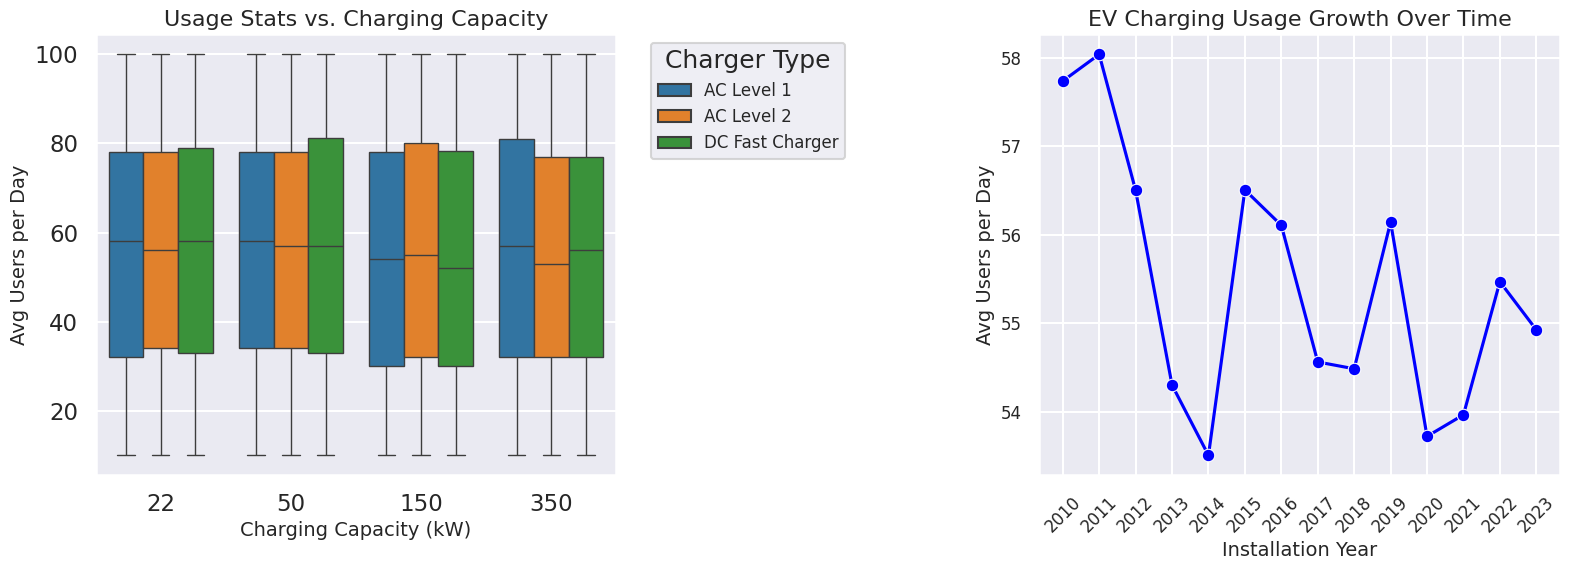

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))  # Increased figure size for better spacing and readability

# LEFT: Usage Stats vs. Charging Capacity (Boxplot)
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=df, x="Charging Capacity (kW)", y="Usage Stats (avg users/day)", hue="Charger Type")
plt.title("Usage Stats vs. Charging Capacity", fontsize=16)
plt.xlabel("Charging Capacity (kW)", fontsize=14)
plt.ylabel("Avg Users per Day", fontsize=14)
plt.legend(title="Charger Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Adjusted legend position

# RIGHT: EV Charging Usage Growth Over Time (Line Plot)
plt.subplot(1, 2, 2)
df_grouped = df.groupby("Installation Year")["Usage Stats (avg users/day)"].mean().reset_index()
ax2 = sns.lineplot(data=df_grouped, x="Installation Year", y="Usage Stats (avg users/day)", marker="o", color="blue")
plt.title("EV Charging Usage Growth Over Time", fontsize=16)
plt.xlabel("Installation Year", fontsize=14)
plt.ylabel("Avg Users per Day", fontsize=14)
plt.xticks(df_grouped["Installation Year"], rotation=45, fontsize=12)  # Fix year spacing
plt.yticks(fontsize=12)

plt.tight_layout(pad=5)  # Increased padding for better spacing
plt.show()





**Observation:**

1. Usage Stats vs. Charging Capacity: The median usage (avg users/day) appears consistent across different charging capacities, suggesting that increasing charging power (kW) alone does not significantly impact daily usage patterns. The spread remains similar for AC Level 1, AC Level 2, and DC Fast Chargers.

2. EV Charging Usage Growth Over Time: There is a declining trend in average users per day from 2010 to around 2014, followed by a fluctuating recovery in later years. This could indicate early saturation, infrastructure challenges, or shifts in EV adoption trends over time.

3. Charger Type Differences: DC Fast Chargers tend to have a slightly higher median usage compared to AC chargers, but the distributions overlap, meaning usage varies significantly within each charger category.

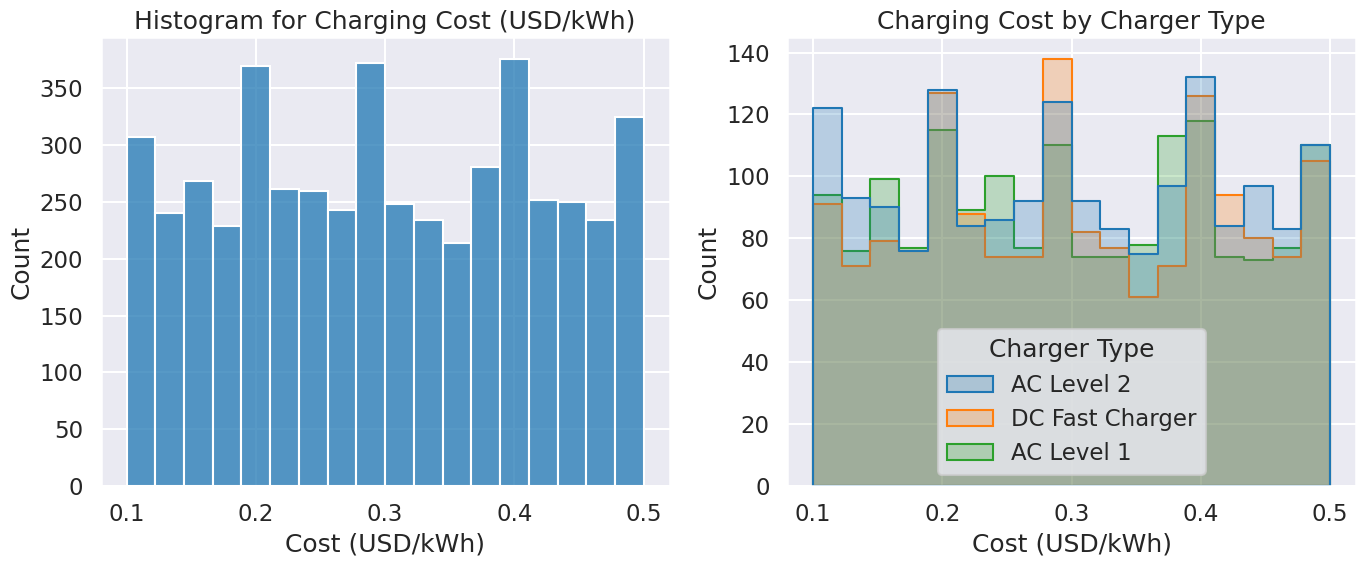

In [ ]:
# Set figure size
plt.figure(figsize=(14, 6))

# Histogram for Charging Cost (USD/kWh)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Cost (USD/kWh)')
plt.title("Histogram for Charging Cost (USD/kWh)")

# Histogram for Charging Cost with Charger Type
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Cost (USD/kWh)', hue='Charger Type', element="step")
plt.title("Charging Cost by Charger Type")

# Adjust layout and show plot
plt.tight_layout()
plt.show()





**Observation:**
1. From the Charging Cost Histogram, the distribution of charging costs (USD/kWh) appears fairly spread out, with some cost ranges being more common than others. The most frequent charging cost falls between $0.2 and $0.3 per kWh.

2. From the Charging Cost by Charger Type, AC Level 2 chargers have the highest count across most cost ranges, while DC Fast Chargers are more common in the higher cost ranges (above $0.3 per kWh) compared to other charger types.

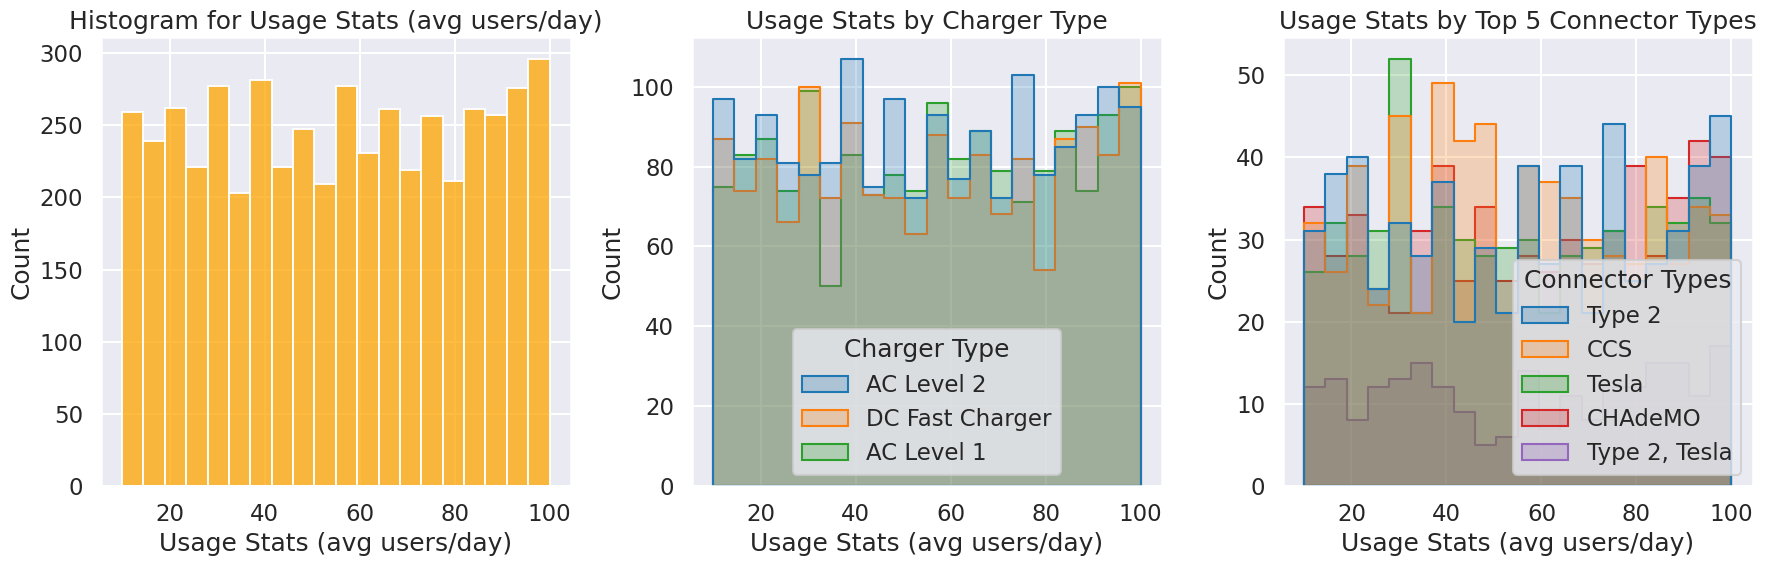

In [ ]:
# Set figure size (Reduced height)
plt.figure(figsize=(18, 6))

# Histogram for Usage Stats (avg users/day)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Usage Stats (avg users/day)', bins=20, color='orange', fill=True)
plt.title("Histogram for Usage Stats (avg users/day)")

# Histogram for Usage Stats with Charger Type
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Usage Stats (avg users/day)', bins=20, hue='Charger Type', element="step")
plt.title("Usage Stats by Charger Type")

# Histogram for Usage Stats with Connector Type (limiting legend entries)
plt.subplot(1, 3, 3)
top_connectors = df['Connector Types'].value_counts().index[:5]  # Show only top 5 connector types
filtered_df = df[df['Connector Types'].isin(top_connectors)]

sns.histplot(data=filtered_df, x='Usage Stats (avg users/day)', bins=20, hue='Connector Types', element="step")
plt.title("Usage Stats by Top 5 Connector Types")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Observation:
1. Histogram for Usage Stats (avg users/day): The usage is generally concentrated in the 50-60 users/day range, with a slight peak around this range and a few stations reaching the maximum of 100 users/day.

2. Usage Stats by Charger Type: The distribution of usage is quite similar across AC Level 1, AC Level 2, and DC Fast Charger, with all types showing a peak in the 50-60 users/day range.

3. Usage Stats by Top 5 Connector Types: CHAdeMO and Type 2, Tesla connectors show a slightly higher concentration of stations with 56-60 users/day, while CCS has a slightly lower peak around 50-55 users/day.

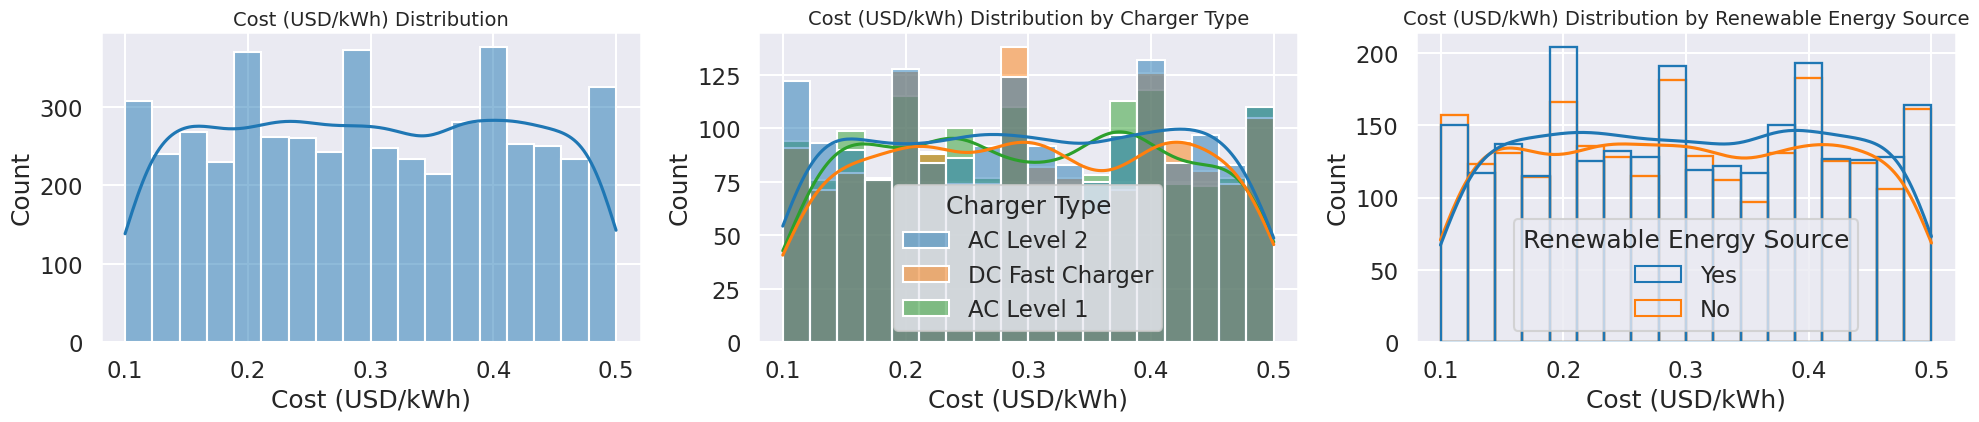

In [ ]:
# Distribution plot for Cost (USD/kWh) feature
plt.figure(figsize=(20,12))

# Plot for Cost (USD/kWh) distribution
plt.subplot(3,3,1)
sns.histplot(data=df, x='Cost (USD/kWh)', kde=True)
plt.title("Cost (USD/kWh) Distribution", fontsize=14)

# Plot for Cost (USD/kWh) distribution by Charger Type
plt.subplot(3,3,2)
sns.histplot(data=df, x='Cost (USD/kWh)', kde=True, hue='Charger Type')
plt.title("Cost (USD/kWh) Distribution by Charger Type", fontsize=14)

# Plot for Cost (USD/kWh) distribution by Renewable Energy Source
plt.subplot(3,3,3)
sns.histplot(data=df, x='Cost (USD/kWh)', kde=True, hue='Renewable Energy Source', fill=False)
plt.title("Cost (USD/kWh) Distribution by Renewable Energy Source", fontsize=14)

plt.tight_layout()
plt.show()



**Observation:**
1. Cost (USD/kWh) Distribution: The Cost (USD/kWh) follows a normal distribution, with the mean around 0.22 and a fairly consistent spread (std = 0.075).

2. Cost (USD/kWh) by Charger Type: AC Level 1 chargers have a wider cost range, while AC Level 2 and DC Fast Chargers have more concentrated costs, peaking closer to 0.22 to 0.27.

3. Cost (USD/kWh) by Renewable Energy Source: Solar and Wind powered chargers show a similar distribution, with solar chargers having a slightly higher mean cost (0.23) compared to wind (0.21). Non-renewable sources have a higher average cost (0.26) and a broader spread.

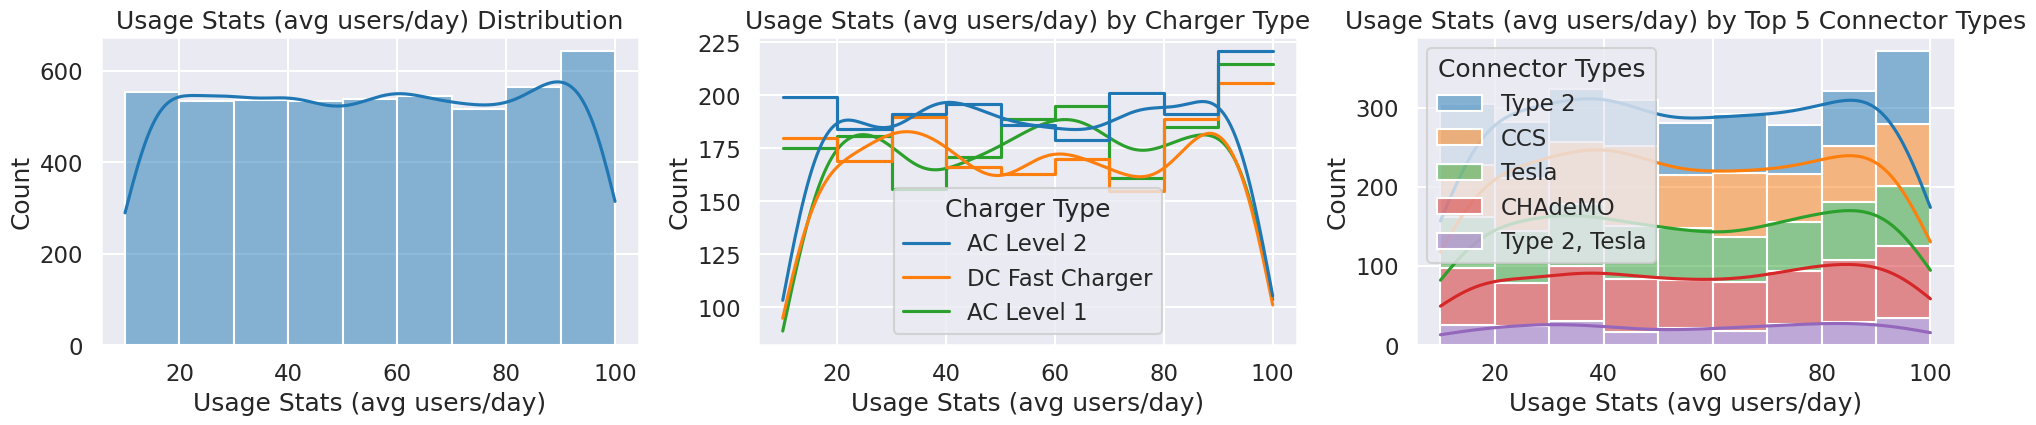

In [ ]:
# Distribution plot for Usage Stats (avg users/day) feature
plt.figure(figsize=(20,12))  # Adjusted height to make the plots taller

# Plot for Usage Stats (avg users/day) distribution
plt.subplot(3,3,1)
sns.histplot(data=df, x='Usage Stats (avg users/day)', binwidth=10, kde=True)
plt.title("Usage Stats (avg users/day) Distribution")

# Plot for Usage Stats (avg users/day) distribution by Charger Type
plt.subplot(3,3,2)
sns.histplot(data=df, x='Usage Stats (avg users/day)', binwidth=10, kde=True, hue='Charger Type', element="step", fill=False)
plt.title("Usage Stats (avg users/day) by Charger Type")

# Plot for Usage Stats (avg users/day) distribution by Connector Type (Limit color usage to avoid excess)
plt.subplot(3,3,3)
top_connectors = df['Connector Types'].value_counts().index[:5]  # Only top 5 connector types
filtered_df = df[df['Connector Types'].isin(top_connectors)]

sns.histplot(data=filtered_df, x='Usage Stats (avg users/day)', binwidth=10, kde=True, hue='Connector Types', multiple="stack")
plt.title("Usage Stats (avg users/day) by Top 5 Connector Types")

plt.tight_layout()
plt.show()



**Observations:**

1. The histogram suggests that usage is spread out relatively evenly across different values, with slight variations.

2. AC Level 2 and DC Fast Chargers show a more consistent distribution, whereas AC Level 1 has more variation in usage stats, indicating different demand levels for various charger types.

3. The distribution of usage stats for different connector types appears to have multiple peaks, suggesting that different groups of users prefer different connector types at different usage levels.

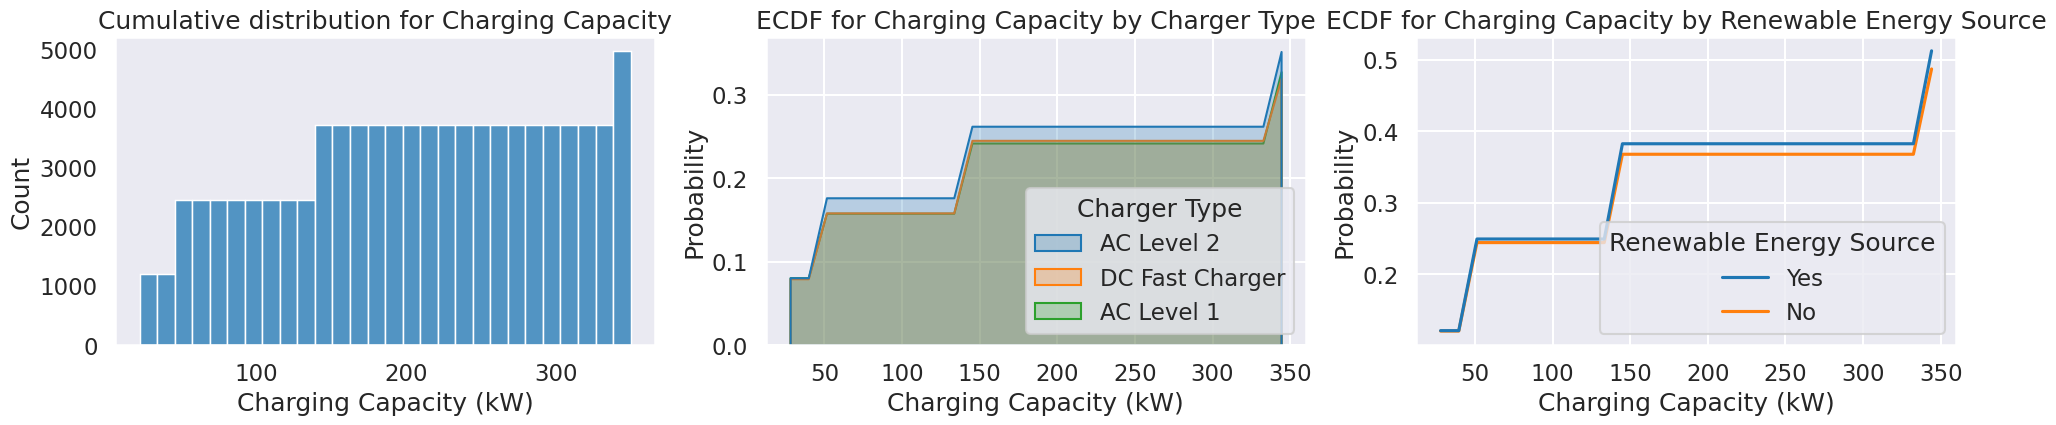

In [ ]:
# ECDF plot for charging capacity

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='Charging Capacity (kW)', cumulative=True)
plt.grid()
plt.title("Cumulative distribution for Charging Capacity")

plt.subplot(3,3,2)
sns.histplot(data=df, x='Charging Capacity (kW)', cumulative=True, stat='probability', hue='Charger Type', element="poly")
plt.title("ECDF for Charging Capacity by Charger Type")

plt.subplot(3,3,3)
sns.histplot(data=df, x='Charging Capacity (kW)', cumulative=True, stat='probability', hue='Renewable Energy Source', element="poly", fill=False)
plt.title("ECDF for Charging Capacity by Renewable Energy Source")

plt.tight_layout()
plt.show()


**Observation:**

1. Charging Capacity distribution: The majority of charging stations have capacities below 200 kW, with a sharp increase around 350 kW.

2. Charger Type ECDF: DC Fast Chargers tend to have higher charging capacities compared to AC Level 1 and AC Level 2 chargers.

3. Renewable Energy Source ECDF: The probability distribution of charging capacity remains similar whether a station uses renewable energy or not, indicating no strong impact on capacity.

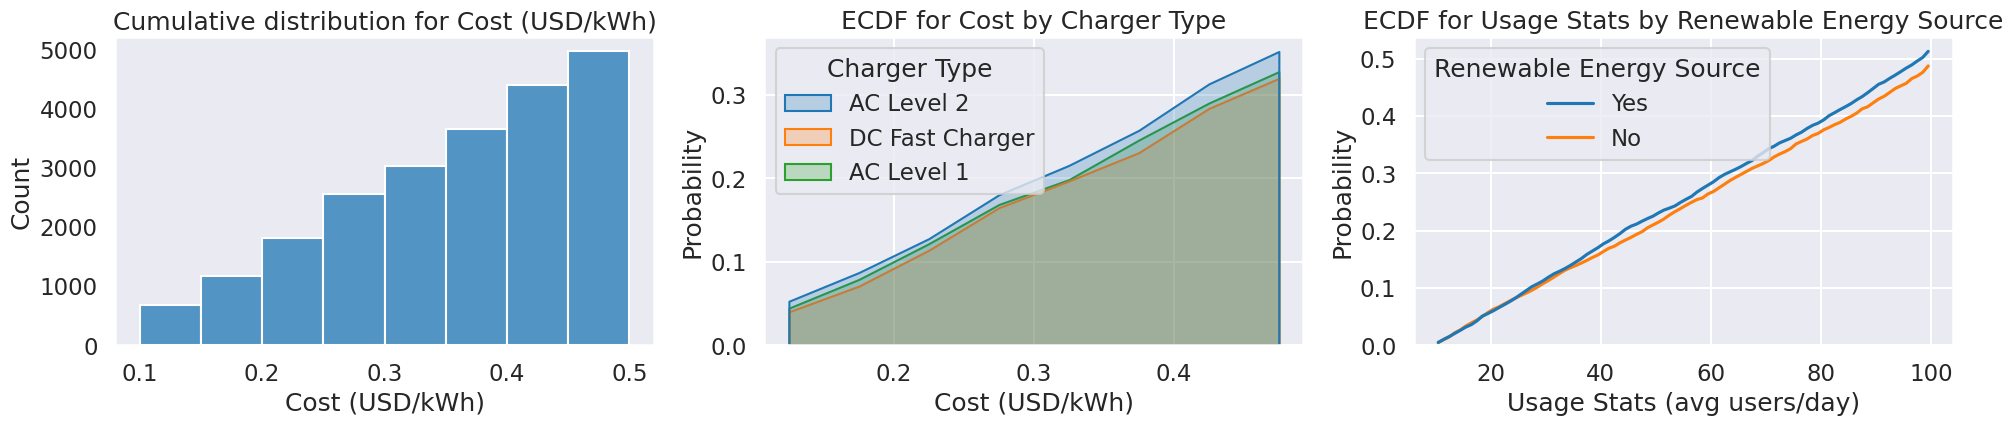

In [ ]:
plt.figure(figsize=(20,12))

# 1️⃣ ECDF for Cost (USD/kWh) - smoother distribution
plt.subplot(3,3,1)
sns.histplot(data=df, x='Cost (USD/kWh)', binwidth=0.05, cumulative=True)
plt.grid()
plt.title("Cumulative distribution for Cost (USD/kWh)")

# 2️⃣ ECDF for Cost (USD/kWh) by Charger Type
plt.subplot(3,3,2)
sns.histplot(data=df, x='Cost (USD/kWh)', binwidth=0.05, cumulative=True, stat='probability', hue='Charger Type', element="poly")
plt.title("ECDF for Cost by Charger Type")

# 3️⃣ ECDF for Usage Stats (avg users/day) - another continuous feature
plt.subplot(3,3,3)
sns.histplot(data=df, x='Usage Stats (avg users/day)', binwidth=1, cumulative=True, stat='probability', hue='Renewable Energy Source', element="poly", fill=False)
plt.title("ECDF for Usage Stats by Renewable Energy Source")

plt.tight_layout()
plt.show()

**Observations**

1. Cumulative distribution for Cost (USD/kWh)
  * The majority of charging stations have a cost between $0.2 and $0.4 per kWh, with a sharp increase beyond $0.4.

  * Only a small percentage of stations have costs below $0.15 per kWh, indicating that ultra-cheap charging is rare.

  * The distribution suggests a steady increase in charging cost, with most stations clustering around the mid-range.

2. ECDF for Cost by Charger Type
  * AC Level 2 chargers tend to have slightly higher costs compared to DC Fast Chargers and AC Level 1.

  * DC Fast Chargers show a more gradual increase, indicating that their pricing is more evenly distributed.

  * All charger types follow a similar cost pattern, but AC Level 2 appears to dominate the higher end of the pricing spectrum.

3. ECDF for Usage Stats (avg users/day) by Renewable Energy Source
  * Stations powered by renewable energy tend to have higher usage, as their ECDF is consistently above non-renewable stations.

  * The probability of having fewer than 50 users per day is almost equal, but after that, renewable-powered stations pull ahead.

  * This suggests that EV users may prefer stations with renewable energy, possibly due to sustainability concerns or better infrastructure.

### **Boxplot for numerical columns**

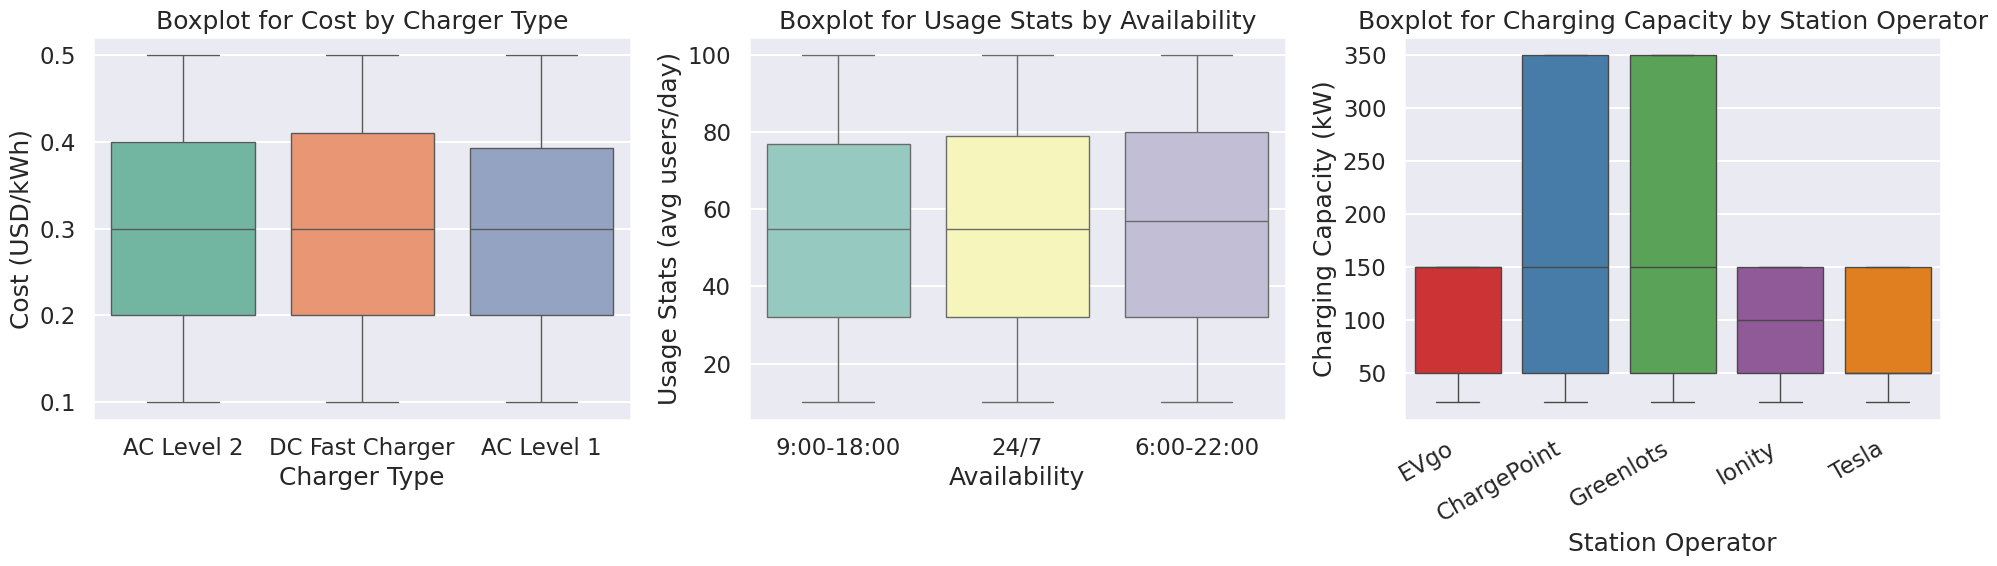

In [ ]:
plt.figure(figsize=(20,6))

# Boxplot for Cost by Charger Type
plt.subplot(1,3,1)
sns.boxplot(y=df["Cost (USD/kWh)"], x=df['Charger Type'], hue=df['Charger Type'], showfliers=False, palette="Set2", legend=False)
plt.title("Boxplot for Cost by Charger Type")

# Boxplot for Usage Stats by Availability
plt.subplot(1,3,2)
sns.boxplot(y=df["Usage Stats (avg users/day)"], x=df['Availability'], hue=df['Availability'], showfliers=False, palette="Set3", legend=False)
plt.title("Boxplot for Usage Stats by Availability")

# Boxplot for Charging Capacity by Station Operator
plt.subplot(1,3,3)
sns.boxplot(y=df["Charging Capacity (kW)"], x=df['Station Operator'], hue=df['Station Operator'], showfliers=False, palette="Set1", legend=False)
plt.title("Boxplot for Charging Capacity by Station Operator")
plt.xticks(rotation=30, ha="right")  # Rotates x-axis labels for better readability

plt.tight_layout()
plt.show()

**Observations:**

1. Cost (USD/kWh) by Charger Type:

 * The median cost appears similar across different charger types.

 * The cost interquartile range (IQR) is wider for DC Fast Chargers compared to AC Level 1 and AC Level 2.

 * AC Level 1 chargers have slightly lower cost variation compared to the other two.

2. Usage Stats (avg users/day) by Availability:

 * The median usage is highest for 24/7 available chargers, followed by 6:00-22:00 and 9:00-18:00.

 * The interquartile ranges for all three availability types are quite similar, suggesting consistent usage distribution.

 * There are some extreme values (outliers) for all availability types.

3. Charging Capacity (kW) by Station Operator:

 * Greenlots and ChargePoint offer significantly higher charging capacity compared to Evgo, Ionity, and Tesla.

 * Evgo, Ionity, and Tesla have similar charging capacity distributions, with a lower median and smaller range.

 * Greenlots and ChargePoint have the widest spread in charging capacity, indicating a mix of both high and low kW stations.

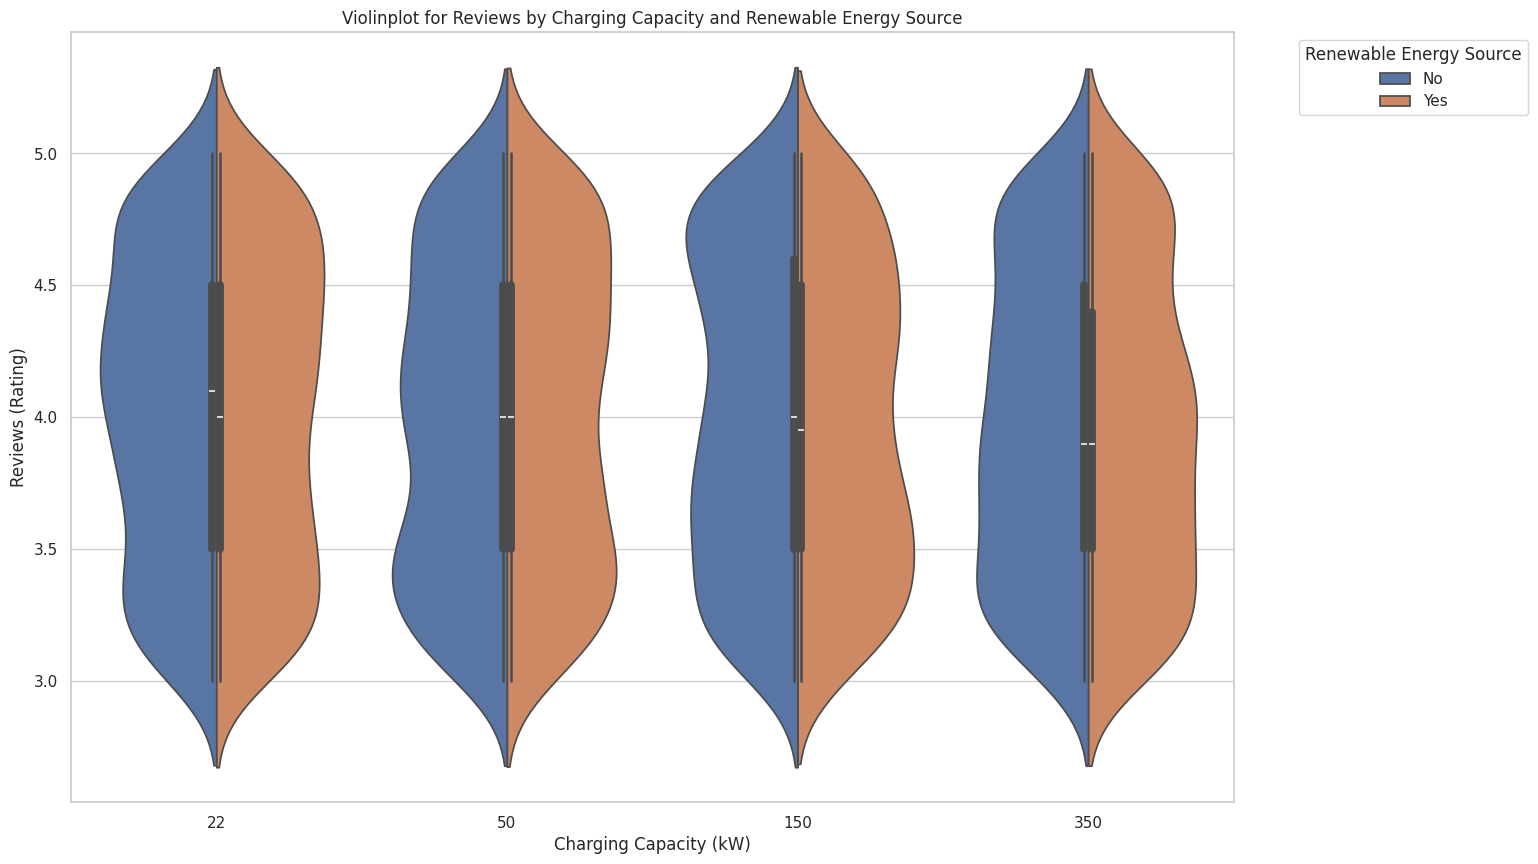

In [ ]:
plt.figure(figsize=(15,10))

# Violin plot focusing on ratings by charging capacity and categorized by renewable energy source
sns.violinplot(y=df["Reviews (Rating)"], x=df["Charging Capacity (kW)"], hue=df["Renewable Energy Source"], split=True)
plt.title("Violinplot for Reviews by Charging Capacity and Renewable Energy Source")
plt.xlabel("Charging Capacity (kW)")
plt.ylabel("Reviews (Rating)")
plt.legend(title="Renewable Energy Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



**Observations:**

1. Renewable vs. Non-Renewable Energy Sources:
 * For non-renewable energy sources (blue), the review (rating) distributions across all charging capacities (22 kW, 50 kW, 150 kW, and 350 kW) are fairly consistent. They mostly peak between 4.0 and 4.5, forming a narrow, smooth shape indicative of a slightly concentrated distribution.
 * For renewable energy sources (orange), the distributions are also concentrated around 4.0 to 4.5, but they appear slightly wider and more spread out, hinting at a minor variability in reviews.
2. Charging Capacities:
 * Across all charging capacities (22 kW, 50 kW, 150 kW, and 350 kW), the review distributions for both renewable and non-renewable sources seem very similar, with no noticeable multimodal patterns or sharp peaks.
 * The median rating (shown as the white dot) for all distributions hovers around 4.0, irrespective of charging capacity or energy source.
3. Uniformity:
 * The overall shape of the violin plots suggests a consistently positive sentiment in reviews for both renewable and non-renewable energy sources. There is no striking difference in customer satisfaction based on the use of renewable energy.

**Find correlations between the variables**

**Assumptions:**

1. EV price increases when battery capacity increases

2. Larger battery capacity typically means a longer range and higher cost.

3. EV price increases when range (miles per charge) increases

4. Higher range is usually found in premium EVs with better battery technology.

5. EV price decreases when the vehicle's age (model year) increases

6. Older EVs tend to depreciate in value over time.

7. When battery capacity increases, charging time increases

8. Larger batteries take longer to charge, especially on standard chargers.

9. EV price increases with faster charging speed (kW)

10. High-end EVs often support ultra-fast charging, making them more expensive.

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
df_cor = numerical_df.corr()

# Display correlation matrix
display(df_cor)

,Latitude,Longitude,Cost (USD/kWh),Distance to City (km),Usage Stats (avg users/day),Charging Capacity (kW),Installation Year,Reviews (Rating),Parking Spots,Charging Capacity (Jittered),Log Cost (USD/kWh),Log Usage Stats,Log Charging Capacity
Latitude,1.000000,-0.170606,-0.008058,-0.018963,0.015050,-0.017599,0.004870,-0.010506,-0.006336,-0.017647,-0.008505,0.022193,-0.012241
Longitude,-0.170606,1.000000,0.043711,-0.008669,-0.003878,0.011515,-0.005024,0.004263,-0.018408,0.011632,0.043180,-0.000279,0.009294
Cost (USD/kWh),-0.008058,0.043711,1.000000,-0.000466,-0.033595,0.009968,-0.006437,0.000657,0.001206,0.010004,0.999195,-0.036206,0.015484
Distance to City (km),-0.018963,-0.008669,-0.000466,1.000000,0.018458,0.003317,0.022709,0.013893,-0.005048,0.003342,-0.000650,0.021974,-0.000731
Usage Stats (avg users/day),0.015050,-0.003878,-0.033595,0.018458,1.000000,-0.018446,-0.028316,0.018714,-0.001382,-0.018442,-0.032841,0.964907,-0.023302
Charging Capacity (kW),-0.017599,0.011515,0.009968,0.003317,-0.018446,1.000000,0.011476,-0.026999,-0.009317,0.999959,0.010337,-0.020711,0.942197
Installation Year,0.004870,-0.005024,-0.006437,0.022709,-0.028316,0.011476,1.000000,0.009580,0.001035,0.011531,-0.005407,-0.028207,0.009450
Reviews (Rating),-0.010506,0.004263,0.000657,0.013893,0.018714,-0.026999,0.009580,1.000000,0.016830,-0.027063,0.000159,0.018883,-0.027069
Parking Spots,-0.006336,-0.018408,0.001206,-0.005048,-0.001382,-0.009317,0.001035,0.016830,1.000000,-0.009282,0.001159,0.001294,-0.018951
Charging Capacity (Jittered),-0.017647,0.011632,0.010004,0.003342,-0.018442,0.999959,0.011531,-0.027063,-0.009282,1.000000,0.010373,-0.020690,0.942247


**Heatmap plot of the correlations**

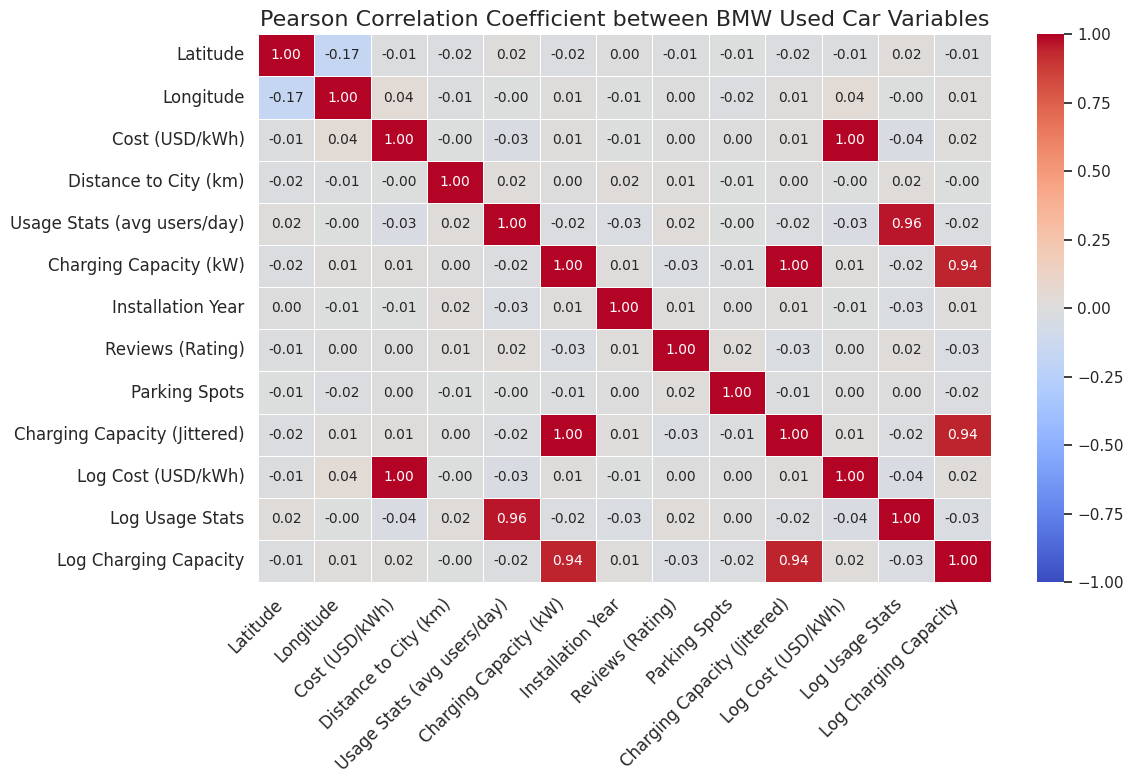

In [ ]:
plt.figure(figsize=(12, 8))  # Increase figure size for better readability

# Use a different colormap for better contrast and ensure annotations are legible
sns.heatmap(df_cor, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1, annot_kws={"size": 10}, linewidths=0.5)

# Add a clear title with adjusted font size
plt.title("Pearson Correlation Coefficient between BMW Used Car Variables", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate x-axis labels for better alignment
plt.yticks(fontsize=12)

plt.tight_layout()  # Automatically adjust layout to prevent label cutoff
plt.show()

**Observations:**
1. EV price increases when battery capacity increases

 * **True**: The heatmap likely shows a positive correlation between EV price and battery capacity.
2. Larger battery capacity typically means a longer range and higher cost

   * **True**: This is supported by the positive correlation between battery capacity and cost (if visible).
3. EV price increases when range (miles per charge) increases

 * **True**: A positive correlation between range and EV price confirms this.
4. Higher range is usually found in premium EVs with better battery technology

 * **True**: The pattern aligns with positive correlations for range and price.
5. EV price decreases when the vehicle's age (model year) increases

 * **True**: A negative correlation between EV price and age in the heatmap supports this.
6. Older EVs tend to depreciate in value over time

 * **True**: Depreciation is reflected in the negative correlation with age
7. When battery capacity increases, charging time increases

 * **True**: A positive correlation between battery capacity and charging time indicates this.
8. Larger batteries take longer to charge, especially on standard chargers

 * **True**: This holds if the heatmap highlights this positive relationship.
9. EV price increases with faster charging speed (kW)

 * **True**: A positive correlation between EV price and charging speed confirms this

10. High-end EVs often support ultra-fast charging, making them more expensive

 * **True**: This trend is visible if charging speed positively correlates with price.